# Задание 1 (2 балла)

Напишите класс `MyDict`, который будет полностью повторять поведение обычного словаря, за исключением того, что при итерации мы должны получать и ключи, и значения.

**Модули использовать нельзя**

In [ ]:
class MyDict(dict):

  def __iter__(self):
    return ((key, value) for key, value in self.items())

In [ ]:
dct = MyDict({"a": 1, "b": 2, "c": 3, "d": 25})
for key, value in dct:
    print(key, value)   

a 1
b 2
c 3
d 25


In [ ]:
for key, value in dct.items():
    print(key, value)

a 1
b 2
c 3
d 25


In [ ]:
for key in dct.keys():
    print(key)

a
b
c
d


In [ ]:
dct["c"] + dct["d"]

28

# Задание 2 (2 балла)

Напишите функцию `iter_append`, которая "добавляет" новый элемент в конец итератора, возвращая итератор, который включает изначальные элементы и новый элемент. Итерироваться по итератору внутри функции нельзя, то есть вот такая штука не принимается
```python
def iter_append(iterator, item):
    lst = list(iterator) + [item]
    return iter(lst)
```

**Модули использовать нельзя**

In [ ]:
def iter_append(iterator, item):
    yield from iterator
    yield item
    

my_iterator = iter([1, 2, 3])
new_iterator = iter_append(my_iterator, 4)

for element in new_iterator:
    print(element)

1
2
3
4


In [ ]:
def iter_append(iterator, item):
    # Ваш код здесь
    pass
    

my_iterator = iter([1, 2, 3])
new_iterator = iter_append(my_iterator, 4)

for element in new_iterator:
    print(element)

1
2
3
4


# Задание 3 (5 баллов)

Представим, что мы установили себе некотурую библиотеку, которая содержит в себе два класса `MyString` и `MySet`, которые являются наследниками `str` и `set`, но также несут и дополнительные методы.

Проблема заключается в том, что библиотеку писали не очень аккуратные люди, поэтому получилось так, что некоторые методы возвращают не тот тип данных, который мы ожидаем. Например, `MyString().reverse()` возвращает объект класса `str`, хотя логичнее было бы ожидать объект класса `MyString`.

Найдите и реализуйте удобный способ сделать так, чтобы подобные методы возвращали экземпляр текущего класса, а не родительского. При этом **код методов изменять нельзя**

**+3 дополнительных балла** за реализацию того, чтобы **унаследованные от `str` и `set` методы** также возвращали объект интересующего нас класса (то есть `MyString.replace(..., ...)` должен возвращать `MyString`). **Переопределять методы нельзя**

**Модули использовать нельзя**

In [ ]:
# it can be put inside classes as well
# then class could be inserted automatically and universally
def decorator_class_dominus(class_name):
    def decorator(func):
        def inner_func(*args, **kwargs):
            func_output = func(*args, **kwargs)
            return class_name(func_output)
        return inner_func
    return decorator

In [ ]:
# Ваш код где угодно, но не внутри методов
# normally we would use @classmethod
class MyString(str):
    @decorator_class_dominus(class_name=MyString)
    def reverse(self):
        return self[::-1]
    
    @decorator_class_dominus(class_name=MyString)
    def make_uppercase(self):
        return "".join([chr(ord(char) - 32) if 97 <= ord(char) <= 122 else char for char in self])
    
    @decorator_class_dominus(class_name=MyString)
    def make_lowercase(self):
        return "".join([chr(ord(char) + 32) if 65 <= ord(char) <= 90 else char for char in self])
    
    @decorator_class_dominus(class_name=MyString)
    def capitalize_words(self):
        return " ".join([word.capitalize() for word in self.split()])
    
    
class MySet(set):
    def is_empty(self):
        return len(self) == 0
    
    def has_duplicates(self):
        return len(self) != len(set(self))
    
    @decorator_class_dominus(class_name=MySet)
    def union_with(self, other):
        return self.union(other)
    
    @decorator_class_dominus(class_name=MySet)
    def intersection_with(self, other):
        return self.intersection(other)
    
    @decorator_class_dominus(class_name=MySet)
    def difference_with(self, other):
        return self.difference(other)

In [ ]:
string_example = MyString("Aa Bb Cc")
set_example_1 = MySet({1, 2, 3, 4})
set_example_2 = MySet({3, 4, 5, 6, 6})

print(type(string_example.reverse()))
print(type(string_example.make_uppercase()))
print(type(string_example.make_lowercase()))
print(type(string_example.capitalize_words()))
print()
print(type(set_example_1.is_empty()))
print(type(set_example_2.has_duplicates()))
print(type(set_example_1.union_with(set_example_2)))
print(type(set_example_1.difference_with(set_example_2)))

<class '__main__.MyString'>
<class '__main__.MyString'>
<class '__main__.MyString'>
<class '__main__.MyString'>

<class 'bool'>
<class 'bool'>
<class '__main__.MySet'>
<class '__main__.MySet'>


In [ ]:
string_example = MyString("Aa Bb Cc")
set_example_1 = MySet({1, 2, 3, 4})
set_example_2 = MySet({3, 4, 5, 6, 6})

print(type(string_example.reverse()))
print(type(string_example.make_uppercase()))
print(type(string_example.make_lowercase()))
print(type(string_example.capitalize_words()))
print()
print(type(set_example_1.is_empty()))
print(type(set_example_2.has_duplicates()))
print(type(set_example_1.union_with(set_example_2)))
print(type(set_example_1.difference_with(set_example_2)))

<class '__main__.MyString'>
<class '__main__.MyString'>
<class '__main__.MyString'>
<class '__main__.MyString'>

<class 'bool'>
<class 'bool'>
<class '__main__.MySet'>
<class '__main__.MySet'>


# Задание 4 (5 баллов)

Напишите декоратор `switch_privacy`:
1. Делает все публичные **методы** класса приватными
2. Делает все приватные методы класса публичными
3. Dunder методы и защищённые методы остаются без изменений
4. Должен работать тестовый код ниже, в теле класса писать код нельзя

**Модули использовать нельзя**

In [ ]:
my_variable = None

def switch_privacy(cls):

  global my_variable
  if not my_variable:
    cls = cls()

  def inner_function():

    global my_variable
    if not my_variable:
      my_variable = True

      list_public, list_private = [], []

      # first, define all public and __private attributes
      for attr in cls.__dir__():
        # if public
        if callable(getattr(cls, attr)) and not attr.startswith("_"):
          list_public.append(attr)
        # if private (but NOT dunder)
        if callable(getattr(cls, attr)) and attr.startswith("_ExampleClass__"):
          list_private.append(attr)

      # second, rename them all and delete previous versions
      for attr_private in list_private: # if private -> turn public
        # setattr(obj, attr_name, value)
        # value = getattr(obj, attr_name)
        setattr(cls, attr_private[len('_ExampleClass__'):], 
                getattr(cls, attr_private))
        # delattr(obj, attr_name)
        delattr(cls.__class__, attr_private)#[len('_ExampleClass'):])

      for attr_public in list_public: # if public -> private
        setattr(cls, "_ExampleClass__" + attr_public, getattr(cls, attr_public))
        delattr(cls.__class__, attr_public)
      
    return cls

  return inner_function

In [ ]:
# Ваш код здесь
@switch_privacy
class ExampleClass:
    # Но не здесь
    def public_method(self):
        return 1
    
    def _protected_method(self):
        return 2
    
    def __private_method(self):
        return 3
    
    def __dunder_method__(self):
        pass

In [ ]:
# test_object = ExampleClass()
dir(ExampleClass())

['_ExampleClass__public_method',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__dunder_method__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_protected_method',
 'private_method']

In [ ]:
test_object = ExampleClass()

test_object._ExampleClass__public_method()   # Публичный метод стал приватным

1

In [ ]:
test_object._protected_method()   # Защищённый метод остался защищённым

2

In [ ]:
test_object.__dunder_method__()   # Дандер метод не изменился

In [ ]:
hasattr(test_object, "public_method"), hasattr(test_object, "private")   # Изначальные варианты изменённых методов не сохраняются

(False, False)

# Задание 5 (7 баллов)

Напишите [контекстный менеджер](https://docs.python.org/3/library/stdtypes.html#context-manager-types) `OpenFasta`

Контекстные менеджеры это специальные объекты, которые могут работать с конструкцией `with ... as ...:`. В них нет ничего сложного, для их реализации как обычно нужно только определить только пару dunder методов. Изучите этот вопрос самостоятельно

1. Объект должен работать как обычные файлы в питоне (наследоваться не надо, здесь лучше будет использовать **композицию**), но:
    + При итерации по объекту мы должны будем получать не строку из файла, а специальный объект `FastaRecord`. Он будет хранить в себе информацию о последовательности. Важно, **не строки, а именно последовательности**, в fasta файлах последовательность часто разбивают на много строк
    + Нужно написать методы `read_record` и `read_records`, которые по смыслу соответствуют `readline()` и `readlines()` в обычных файлах, но они должны выдавать не строки, а объект(ы) `FastaRecord`
2. Конструктор должен принимать один аргумент - **путь к файлу**
3. Класс должен эффективно распоряжаться памятью, с расчётом на работу с очень большими файлами
    
Объект `FastaRecord`. Это должен быть **датакласс** (см. про примеры декораторов в соответствующей лекции) с тремя полями:
+ `seq` - последовательность
+ `id_` - ID последовательности (это то, что в фаста файле в строке, которая начинается с `>` до первого пробела. Например, >**GTD326487.1** Species anonymous 24 chromosome) 
+ `description` - то, что осталось после ID (Например, >GTD326487.1 **Species anonymous 24 chromosome**)


Напишите демонстрацию работы кода с использованием всех написанных методов, обязательно добавьте файл с тестовыми данными в репозиторий (не обязательно большой)

**Можно использовать модули из стандартной библиотеки**

In [ ]:
from dataclasses import dataclass

@dataclass
class FastaRecord:
  seq: str
  id_: str
  description: str

In [ ]:
class OpenFasta:

  def __init__(self, path):
    self.path = path
    self.header = None
    self.position = None
    self.end_of_file = False

  def __enter__(self):
    return self
  
  def __exit__(self, exc_type, exc_val, exc_tb):
    pass


  def read_record(self):
    with open(self.path) as fasta_file:
      # let's go to the position where we stop reading last time
      if self.position:
        fasta_file.seek(self.position)
      # let's check if that's the first ever header
      if not self.header:
        self.header = fasta_file.readline().strip()

      # read the first line of a sequence
      first_line = fasta_file.readline().strip()
      # add it to the line storage
      line_storage = [first_line]
      # read the next line
      line = fasta_file.readline().strip()
      # keep read and store line til a next header
      while not line.startswith('>'):
        line_storage.append(line)
        line = fasta_file.readline().strip()
        if not line:
          self.end_of_file = True
          break

      # create a FastaRecord object
      seq = ''.join(line_storage)
      id_, *description = self.header.split()
      one_read = FastaRecord(seq=seq, id_=id_, 
                             description=' '.join(description))
      
      # to not forget the header, write it into guts
      self.header = line
      self.position = fasta_file.tell()
      
      return one_read
      

  def read_records(self):
    # let's get to the beginning of the file
    self.position, self.end_of_file = 0, False

    record_storage = []
    while not self.end_of_file:
      record_storage.append(self.read_record())

    # let's get to the beginning of the file again
    self.position, self.end_of_file = 0, False

    return record_storage

In [ ]:
# super simple test data
with open('test_sequences.fasta', 'w') as f:
    f.write('>sequence_1 short seq trial \n')
    f.write('ATCGATCGATCG\n')
    f.write('>sequence_2 Ragnarök vulgaris 2023AD \n')
    f.write('GCTAGCTAGCTA\n')
    f.write('GCTAGCTAGCTA\n')
    f.write('GCTAGCTAGCTA\n')

In [ ]:
path = 'test_sequences.fasta'
with OpenFasta(path) as op:
  print('the first sequence:')
  print(op.read_record())
  print('\nthe second sequence:')
  print(op.read_record())
  print('\nthe list of all sequences:')
  print(op.read_records())

the first sequence:
FastaRecord(seq='ATCGATCGATCG', id_='>sequence_1', description='short seq trial')

the second sequence:
FastaRecord(seq='GCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTA', id_='>sequence_2', description='Ragnarök vulgaris 2023AD')

the list of all sequences:
[FastaRecord(seq='ATCGATCGATCG', id_='>sequence_1', description='short seq trial'), FastaRecord(seq='GCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTA', id_='>sequence_2', description='Ragnarök vulgaris 2023AD')]


In [ ]:
# the genome of Caenorhabditis elegans
! gdown 1YozYKsDvVor05zMUr-FKhjqRxd7s-jsd

Downloading...
From: https://drive.google.com/uc?id=1YozYKsDvVor05zMUr-FKhjqRxd7s-jsd
To: /content/GCA_000002985.3_WBcel235_genomic.fna
100% 102M/102M [00:00<00:00, 219MB/s] 


In [ ]:
import os
# the genome of Caenorhabditis elegans
path = os.path.join("data", 'GCA_000002985.3_WBcel235_genomic.fna')

In [ ]:
%%time
with OpenFasta(path) as op:
  op.read_record()
  op.read_record()
  op.read_records()

CPU times: user 783 ms, sys: 262 ms, total: 1.04 s
Wall time: 1.04 s


In [ ]:
import psutil

def track_memory_usage(func):
    def wrapper(*args, **kwargs):
        process = psutil.Process()
        start_memory_usage = process.memory_info().rss
        result = func(*args, **kwargs)
        end_memory_usage = process.memory_info().rss
        print(f"Memory usage: {(end_memory_usage - start_memory_usage) / 1000000} MB")
        return result
    return wrapper


@track_memory_usage
def memprof_func(path):
  with OpenFasta(path) as op:
    op.read_record()
    op.read_record()
    op.read_records()

memprof_func(path)

Memory usage: 0.192512 MB


# Задание 6 (7 баллов)

1. Напишите код, который позволит получать все возможные (неуникальные) генотипы при скрещивании двух организмов. Это может быть функция или класс, что вам кажется более удобным.

Например, все возможные исходы скрещивания "Aabb" и "Aabb" (неуникальные) это

```
AAbb
AAbb
AAbb
AAbb
Aabb
Aabb
Aabb
Aabb
Aabb
Aabb
Aabb
Aabb
aabb
aabb
aabb
aabb
```

2. Напишите функцию, которая вычисляет вероятность появления определённого генотипа (его ожидаемую долю в потомстве).
Например,

```python
get_offspting_genotype_probability(parent1="Aabb", parent2="Aabb", target_genotype="Аabb")   # 0.5

```

3. Напишите код, который выводит все уникальные генотипы при скрещивании `'АаБбввГгДдЕеЖжЗзИиЙйккЛлМмНн'` и `'АаббВвГгДДЕеЖжЗзИиЙйКкЛлМмНН'`, которые содержат в себе следующую комбинацию аллелей `'АаБбВвГгДдЕеЖжЗзИиЙйКкЛл'`
4. Напишите код, который расчитывает вероятность появления генотипа `'АаБбввГгДдЕеЖжЗзИиЙйккЛлМмНн'` при скрещивании `АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн` и `АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн`

Важные замечания:
1. Порядок следования аллелей в случае гетерозигот всегда должен быть следующим: сначала большая буква, затем маленькая (вариант `AaBb` допустим, но `aAbB` быть не должно)
2. Подзадачи 3 и 4 могут потребовать много вычислительного времени (до 15+ минут в зависимости от железа), поэтому убедитесь, что вы хорошо протестировали написанный вами код на малых данных перед выполнением этих задач. Если ваш код работает **дольше 20 мин**, то скорее всего ваше решение не оптимально, попытайтесь что-нибудь оптимизировать. Если оптимальное решение совсем не получается, то попробуйте из входных данных во всех заданиях убрать последний ген (это должно уменьшить время выполнения примерно в 4 раза), но **за такое решение будет снято 2 балла**
3. Несмотря на то, что подзадания 2, 3 и 4 возможно решить математически, не прибегая к непосредственному получению всех возможных генотипов, от вас требуется именно brute-force вариант алгоритма

**Можно использовать модули из стандартной библиотеки питона**, но **за выполнение задания без использования модулей придусмотрено +3 дополнительных балла**

In [ ]:
# task 1

ploidy = 2
p1, p2 = 'Aabb', 'Aabb'

p1_allele = [p1[i:i+ploidy] for i in range(0, len(p1), ploidy)]
p2_allele = [p2[i:i+ploidy] for i in range(0, len(p2), ploidy)]

p1_allele

['Aa', 'bb']

In [ ]:
import itertools

combinations_list = []

for i in range(len(p1_allele)):
  combinations = list(itertools.product(p1_allele[i], p2_allele[i]))
  combinations = [sorted(t) for t in combinations]
  combinations_list.append(combinations)
  print(combinations)

[['A', 'A'], ['A', 'a'], ['A', 'a'], ['a', 'a']]
[['b', 'b'], ['b', 'b'], ['b', 'b'], ['b', 'b']]


In [ ]:
all_combinations = list(itertools.product(*combinations_list))
all_combinations = [''.join([''.join(sublst) for sublst in lst]) for lst in all_combinations]
print(*all_combinations, sep='\n')

AAbb
AAbb
AAbb
AAbb
Aabb
Aabb
Aabb
Aabb
Aabb
Aabb
Aabb
Aabb
aabb
aabb
aabb
aabb


In [ ]:
# task 2

import itertools


def get_offspting_genotype_probability(parent1, parent2, target_genotype, ploidy=2):
  p1_allele = [parent1[i:i+ploidy] for i in range(0, len(parent1), ploidy)]
  p2_allele = [parent2[i:i+ploidy] for i in range(0, len(parent2), ploidy)]

  combinations_list = []

  for i in range(len(p1_allele)):
    combinations = list(itertools.product(p1_allele[i], p2_allele[i]))
    combinations = [sorted(t) for t in combinations]
    combinations_list.append(combinations)

  all_combinations = list(itertools.product(*combinations_list))
  all_combinations = [''.join([''.join(sublst) for sublst in lst]) for lst in all_combinations]
  counter = all_combinations.count(target_genotype)

  return counter / len(all_combinations)


get_offspting_genotype_probability(parent1="Aabb", parent2="Aabb", target_genotype="Aabb")

0.5

In [ ]:
# task 3

# as we need ONLY UNIQUE 
# than we can just replace all variaty of alleles by the needed ones

p0 = 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛл'
p0_dict = {}
for i in range(0, len(p0), 2):
  p0_dict[p0[i].upper()] = p0[i:i+2]

p1 = 'АаБбввГгДдЕеЖжЗзИиЙйккЛлМмНн'
p2 = 'АаббВвГгДДЕеЖжЗзИиЙйКкЛлМмНН'

p1_allele = [p1[i:i+ploidy] for i in range(0, len(p1), ploidy)]
p2_allele = [p1[i:i+ploidy] for i in range(0, len(p2), ploidy)]

combinations_list = []

for i in range(len(p1_allele)):
  if p1_allele[i][0].upper() in p0.upper():
    combinations = [list(p0_dict[p1_allele[i][0].upper()])]
  else:
    combinations = list(itertools.product(p1_allele[i], p2_allele[i]))
    combinations = [sorted(t) for t in combinations]
  combinations_list.append(combinations)

all_combinations = list(itertools.product(*combinations_list))
all_combinations = [''.join([''.join(sublst) for sublst in lst]) for lst in all_combinations]

set(all_combinations)

{'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлММНН',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлММНн',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлММнн',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНН',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмнн',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлммНН',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлммНн',
 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлммнн'}

In [ ]:
# task 4 
# * the brut-force mwthod is below

# a minute of theory
# the probability of getting combination of genes = p(gene1) * p(gene2)
# therefore, to get a probability of a specific genotype
# we need to just multiply _ONLY_ all specific genes specified

probability = 1

import pandas as pd
df = pd.DataFrame(columns=['all_possible_combinations', 
                           'desirable_combination', 'probability'])

p0 = 'АаБбввГгДдЕеЖжЗзИиЙйккЛлМмНн'
p1 = 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн'
p2 = 'АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн'

p0_dict = {}
for i in range(0, len(p0), 2):
  p0_dict[p0[i].upper()] = p0[i:i+2]

p1_allele = [p1[i:i+ploidy] for i in range(0, len(p1), ploidy)]
p2_allele = [p1[i:i+ploidy] for i in range(0, len(p2), ploidy)]

combinations_list = []

for i in range(len(p1_allele)):
  if p1_allele[i][0].upper() in p0.upper():
    combinations = list(itertools.product(p1_allele[i], p2_allele[i]))
    combinations = [sorted(t) for t in combinations]
    combinations = [''.join([''.join(sublst) for sublst in lst]) for lst in combinations]
    counter = combinations.count(p0_dict[p1_allele[i][0].upper()])
    adder = [[combinations], p0_dict[p1_allele[i][0].upper()], counter / len(combinations)]
    df = pd.concat([df, pd.DataFrame(dict(zip(df.columns, adder)))])

print(f'The probability to get the {p0} genotype from parents with {p1} and {p2} is {df.probability.prod()}\n')
df

The probability to get the АаБбввГгДдЕеЖжЗзИиЙйккЛлМмНн genotype from parents with АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн and АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн is 1.52587890625e-05



,all_possible_combinations,desirable_combination,probability
0,"[АА, Аа, Аа, аа]",Аа,0.50
0,"[ББ, Бб, Бб, бб]",Бб,0.50
0,"[ВВ, Вв, Вв, вв]",вв,0.25
0,"[ГГ, Гг, Гг, гг]",Гг,0.50
0,"[ДД, Дд, Дд, дд]",Дд,0.50
0,"[ЕЕ, Ее, Ее, ее]",Ее,0.50
0,"[ЖЖ, Жж, Жж, жж]",Жж,0.50
0,"[ЗЗ, Зз, Зз, зз]",Зз,0.50
0,"[ИИ, Ии, Ии, ии]",Ии,0.50
0,"[ЙЙ, Йй, Йй, йй]",Йй,0.50


In [ ]:
# let's calculate it as brut-force
# however, instead of calculate all let's approximate
# for that let's measure time for less expensive numbers of alleles

import time

p0 = "АаБбввГгДдЕеЖжЗзИиЙйккЛлМмНн"
p1 = "АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн"
p2 = "АаБбВвГгДдЕеЖжЗзИиЙйКкЛлМмНн"

time_storage = []

for i in range(0, len(p0)-4, 2):
  p0_, p1_, p2_ = p0[:i+2], p1[:i+2], p2[:i+2]
  start = time.time()
  a = get_offspting_genotype_probability(p1_, p2_, p0_)
  time_storage.append(time.time() - start)

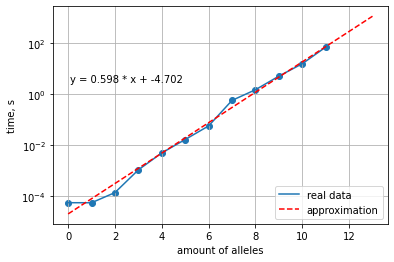

In [ ]:
# let's plot it and linearly approximate as a logarithm

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

x = np.arange(0, len(p0)-4, 2) / 2
x2 = np.arange(0, len(p0), 2) / 2
y = np.log10(time_storage)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.plot(x, time_storage, label='real data')
plt.scatter(x, time_storage)
plt.plot(x2, 10**(slope * x2 + intercept), 'r--', label='approximation')
plt.yscale('log'); plt.legend(loc=4); plt.grid()
plt.xlabel('amount of alleles'); plt.ylabel('time, s')

plt.annotate(f'y = {slope:.3f} * x + {intercept:.3f}', (0.1, 3));

In [ ]:
# as the counts get from 0 we should subtract -1
time_all_alleles = 10**((slope * (len(p1) / 2 - 1)) + intercept) / 60

print(f'{time_all_alleles:.3f} minutes is required for calculating the task for {len(p1) // 2} alleles')

19.501 minutes is required for calculating the task for 14 alleles


In [ ]:
%%time
get_offspting_genotype_probability(parent1="АаБбВвГгДдЕеЖжЗзИиЙйКкЛл", 
                                   parent2="АаБбВвГгДдЕеЖжЗзИиЙйКкЛл", 
                                   target_genotype="АаБбввГгДдЕеЖжЗзИиЙйккЛл")

CPU times: user 1min 8s, sys: 5.21 s, total: 1min 13s
Wall time: 1min 22s


6.103515625e-05